In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

---
TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

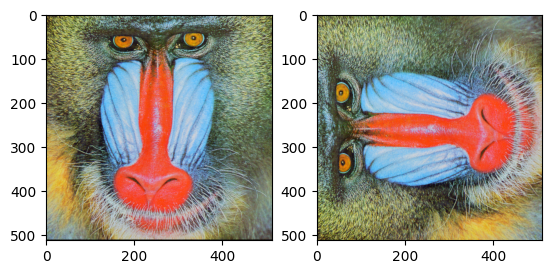

In [2]:
img = cv2.imread('mandril.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

plt.subplot(1, 2, 1)
plt.imshow(img) #Visualiza con mapa de color gris


ancho = canny.shape[1]
alto = canny.shape[0]
M = cv2.getRotationMatrix2D((ancho//2,alto//2),90,1)
img = cv2.warpAffine(img,M,(ancho,alto))

plt.subplot(1, 2, 2)
plt.imshow(img) #Visualiza con mapa de color gris

plt.show()



Mayores en columnas:  [108 131 382 386 396]


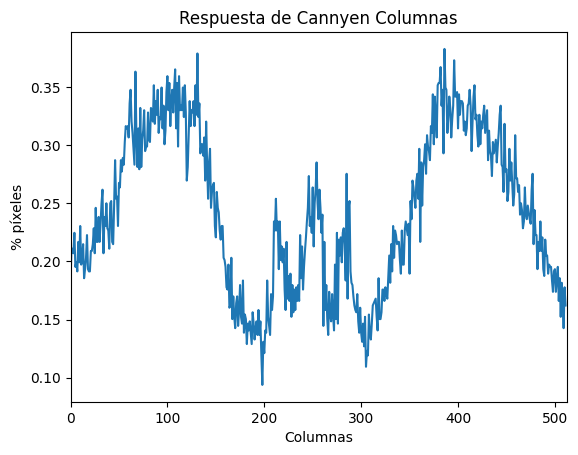

Mayores en filas:  [510]


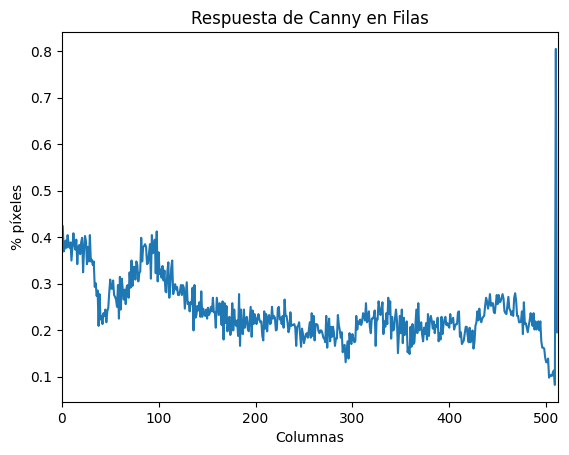

In [3]:
#--------- Columnas ---------#
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten();
#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts / (255 * canny.shape[0])

resmax1 = np.where(cols >= cols.max()*0.95)[0]
print("Mayores en columnas: ", resmax1)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.title("Respuesta de Cannyen Columnas")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.xlim([0, canny.shape[0]])
plt.show()
#--------- Fin Columnas ---------#

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
filas = canny.shape[0]

filas_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten();
filas = filas_counts / (255 * canny.shape[0])

resmax2 = np.where(filas >= filas.max()*0.95)[0]
print("Mayores en filas: ", resmax2)

plt.figure()
plt.title("Respuesta de Canny en Filas")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(filas)
plt.xlim([0, canny.shape[0]])
plt.show()

---
TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 o 255), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

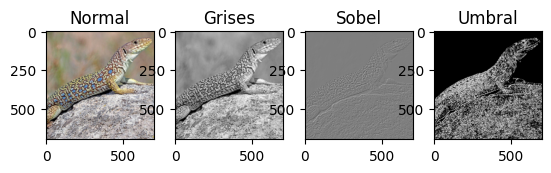

In [4]:
#Lee imagen de archivo
img = cv2.imread('descarga.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.subplot(1, 4, 1)
plt.title("Normal")
plt.imshow(img_rgb)

# 1 - Tenemos la imagen gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 4, 2)
plt.title("Grises")
plt.imshow(gris, cmap='gray')

# 2 -Calculamos sobel
#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(gris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(gris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

plt.subplot(1, 4, 3)

plt.title("Sobel")
plt.imshow(sobel, cmap='gray')

# 3 -Umbralizamos
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), 175, 255, cv2.THRESH_BINARY)


plt.subplot(1, 4, 4)
plt.title("Umbral")
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

[450]


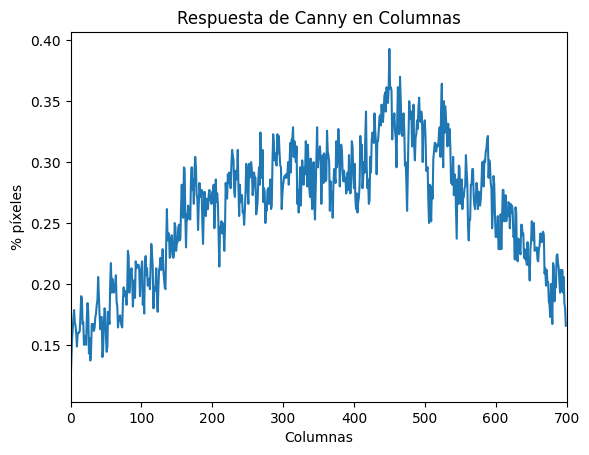

In [5]:
#--------- Columnas ---------#
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten();
#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts / (255 * imagenUmbralizada.shape[0])

resmax1 = np.where(cols >= cols.max()*0.95)[0]
print(resmax1)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.title("Respuesta de Canny en Columnas")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.xlim([0, imagenUmbralizada.shape[0]])
plt.show()
#--------- Fin Columnas ---------#

[437 556 566 567 568 570 572 589 591 635]


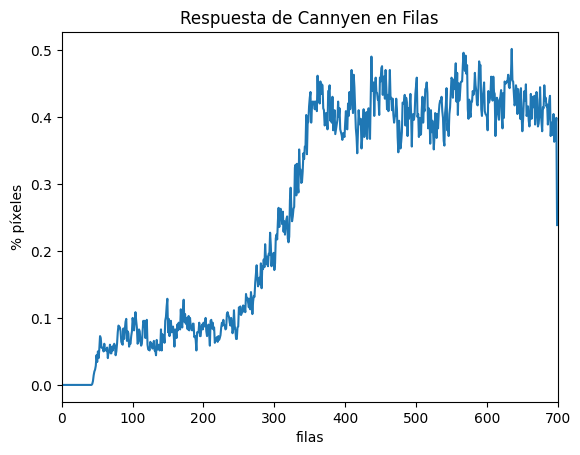

In [6]:
#--------- Filas ---------#
# Se traslada la matriz para poder indentificar las filas
filas_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten();

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
filas = filas_counts / (255 * imagenUmbralizada.shape[0])

resmax2 = np.where(filas >= filas.max()*0.95)[0];

print(resmax2)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.title("Respuesta de Cannyen en Filas")
plt.xlabel("filas")
plt.ylabel("% píxeles")
plt.plot(filas)
plt.xlim([0, imagenUmbralizada.shape[0]])
plt.show()
#--------- Fin Filas ---------#

Filas:  [450]
Columnas:  [437 556 566 567 568 570 572 589 591 635]


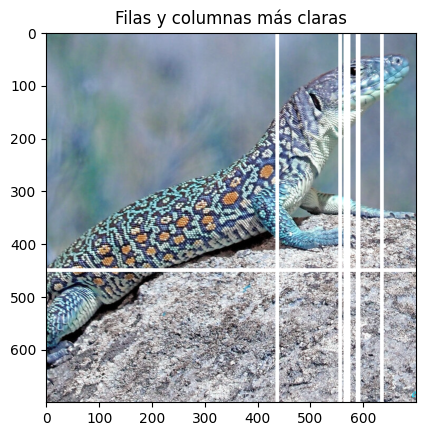

In [7]:
#Fila más clara más clara 
for i in range(len(resmax2)):
    cv2.line(img, (resmax2[i], 0), (resmax2[i], gris.shape[1]), (255, 255, 255), 5)
print("Filas: ", resmax1)
    
for i in range(len(resmax1)):    
    cv2.line(img, (0, resmax1[i]), (gris.shape[0], resmax1[i]), (255, 255, 255), 5)
print("Columnas: ", resmax2)
plt.figure()
plt.title("Filas y columnas más claras")
plt.imshow(img) #Visualiza con mapa de color
plt.show()

---
TAREA: Componer un repertorio de habilidades (alternando entre ellas con eventos de ratón o teclado) combinando las funciones vistas hasta este momento aplicadas sobre la entreda de la webcam.

In [8]:

def prueba1():
    vid = cv2.VideoCapture(0)

    #Marca de inicio
    disponible = 0 
    while(True):      
        # fotograma a fotograma
        ret, frame = vid.read()

        if ret:
            if disponible > 0:
                dif = cv2.absdiff(frame, pframe)        
                # Muestra resultado
                cv2.imshow('Diferencia', dif)        

            else:
                disponible = 1

            #Copia fotograma actual para la diferencia en el siguiente forograma
            pframe = frame.copy()
        # Detenemos pulsado ESC
        if cv2.waitKey(20) == 27:
            break
        if cv2.waitKey(20) == 32:
            prueba2()
            break

            
    
    # Libera el objeto de captura
    vid.release()
    # Destruye ventanas
    cv2.destroyAllWindows()


def prueba2():
    vid = cv2.VideoCapture(0)
    # Fondo
    # Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
    eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=50, varThreshold=50, detectShadows=True)
    
    while(True):      
        # fotograma a fotograma
        ret, frame = vid.read()

        if ret:
            # Aplica efecto espejo sobre la entrada
            framem=cv2.flip(frame, 1)

            objetos = eliminadorFondo.apply(framem)
            

            # Muestra resultado
            cv2.imshow('Diferencia', objetos)
    
    
        # Detenemos pulsado ESC
        if cv2.waitKey(20) == 27:
            break
        if cv2.waitKey(20) == 32:
            prueba1()
            break
            
    
    # Libera el objeto de captura
    vid.release()
    # Destruye ventanas
    cv2.destroyAllWindows()



In [9]:
prueba1()

---
TAREA: Ver el vídeo de My little piece of privacy, proponer una reinterpretación.  
- Alguna reinterpretación podría ser tener un par de cámaras y detrás de un espejo, de forma que una de las cámaras identifique las caras, y gracaias a esta, que la otra cámara se mueva hasta la cara de la persona, sin que esa persona lo sepa, ya que ambas están tapadas por el espejo. De esta forma podríamos tener un primer plano de las facciones de las personas para poder hacer algún tipo de estadísticas.